# The Sparks Foundation
## Data Science & Business Analytics
### Liza Rani Choudhury

## Task 3

### Exploratory Data Analysis - Retail

EDA is a process of analyzing the datasets to summarize their main features using numerical and visual methods


In [2]:
##Let's import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize']=[15,8]

### Read the data 

In [4]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Check the size and variable types of the data

In [5]:
df.shape

(9994, 13)

**Interpretation:** The dataset has 9994 observations and 13 variables

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

The variables Postal Code, Sales, Quantity, Discount, Profit are numeric while others are categorical.

Remove the insignificant variable

In [7]:
df=df.drop('Postal Code',axis=1)

In [8]:
df.duplicated().sum()

50

In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Interpretation:** There is no missing values in the dataset, however there is 17 duplicated rows .

The DataFrame.describe() gives the summary statistics of the numeric variables in the dataset


In [11]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


**Interpretation:** The superstore has average sales of 230 with standard deviation 624

The DataFrame.describe(include = ‘object’ ) gives the summary statistics of the categorical  variables in the dataset


In [12]:
df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9944,9944,9944,9944,9944,9944,9944,9944
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5930,5160,9944,906,1980,3177,5986,1518


As the total dataset is for a unique country ,we can drop the country column.

In [13]:
df=df.drop('Country',axis=1)

## Distribution of the data

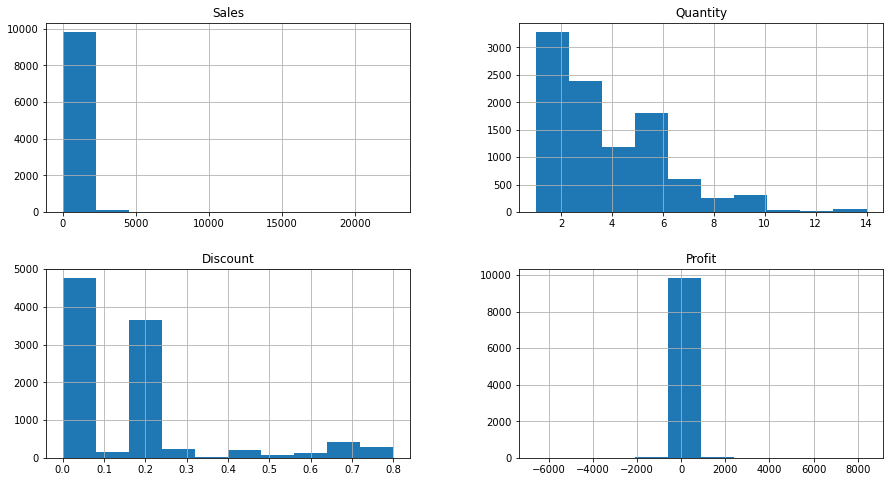

Sales       12.946427
Quantity     1.273812
Discount     1.681206
Profit       7.541727
dtype: float64


In [14]:
df.hist()
plt.show()
print(df.skew())

The variables quantity,discount are positively skewed

## Correlation

In [15]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


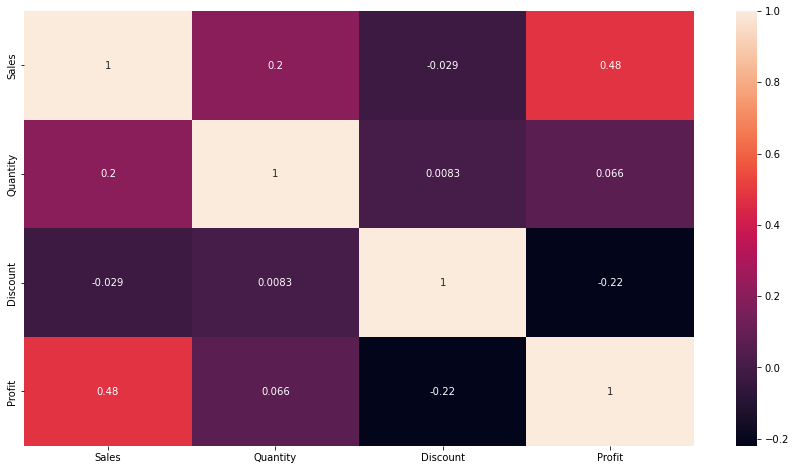

In [16]:
sns.heatmap(df.corr(),annot=True)
plt.show()

It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero, however profit and sales show some correlation

## Analyzing Categorical Variables

In [17]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

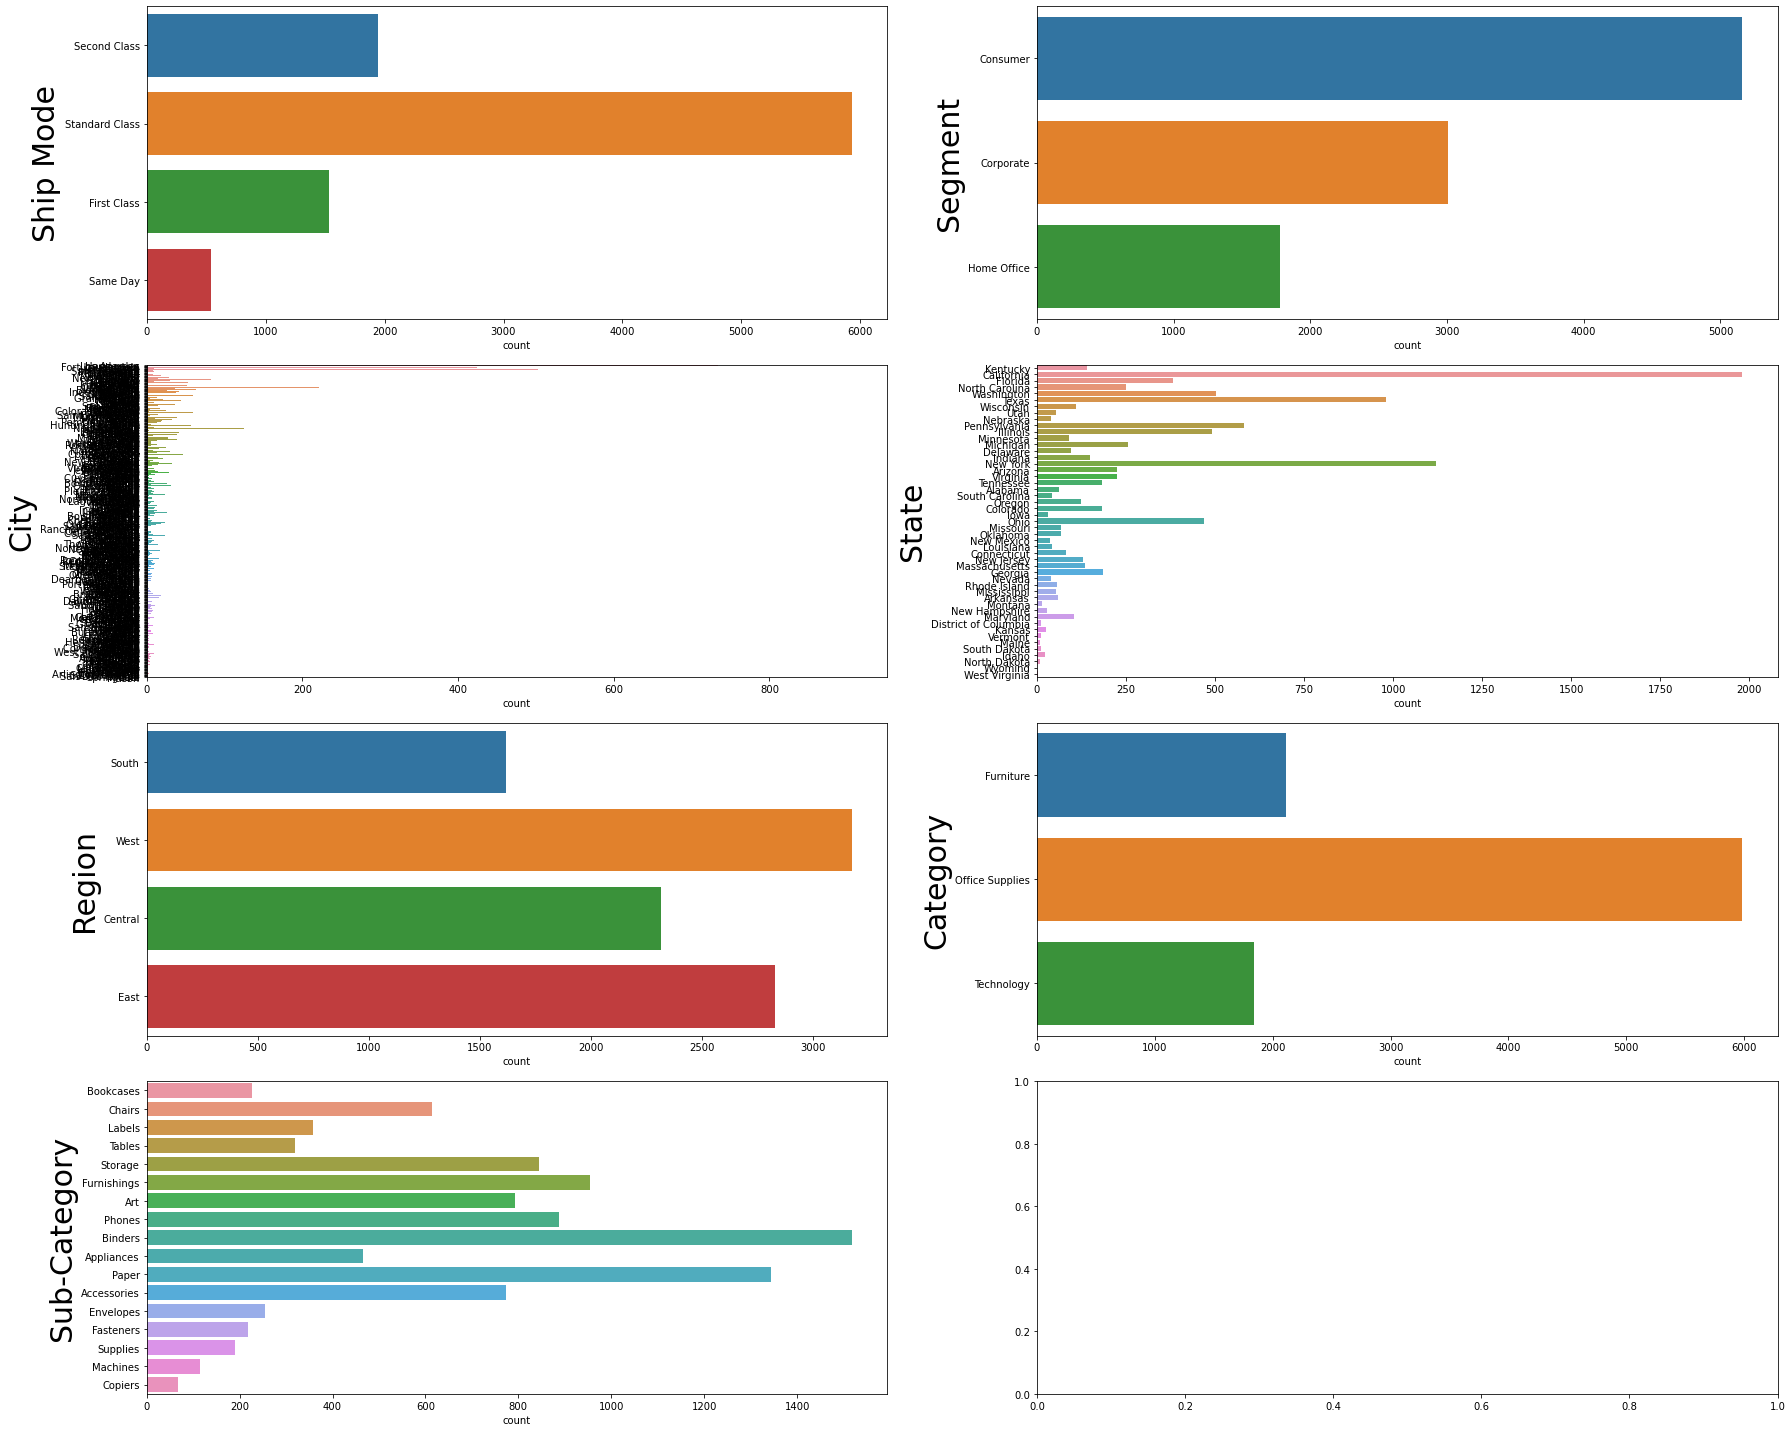

In [18]:
df_cat= df.select_dtypes(include='O')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_cat, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

    From the above plot we see that:
    Maximum shipment was through Standard class
    from west region the highest sales was done maximum sale was done from the Binders subcategory followed by Papers & Furnishings,which are mostly belong to office supplies category
    The Consumer segment caused the max sales

#### Pairwise relation between all the numeric variables

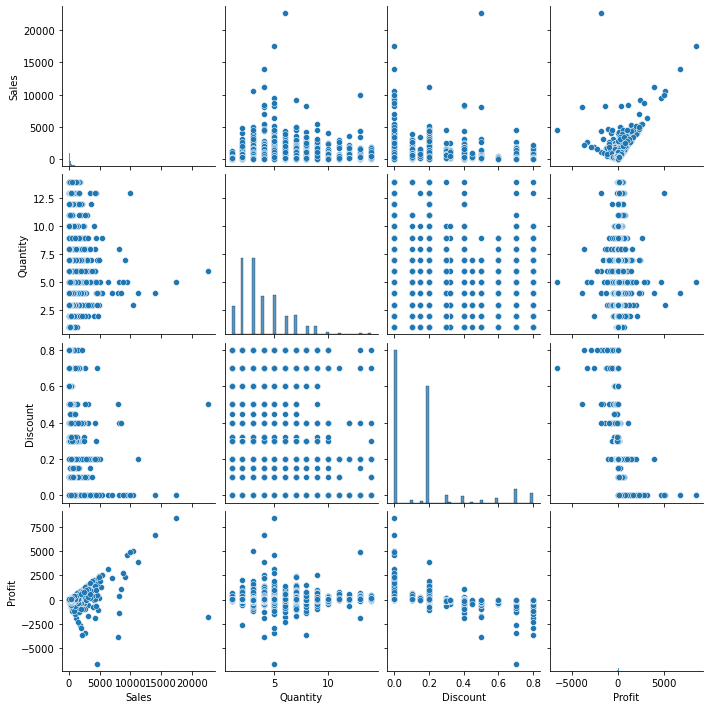

In [19]:
sns.pairplot(df)
plt.show()

At the lower sales the profit is not certain ,but it gives profit at when the sales is high.

<AxesSubplot:xlabel='Region'>

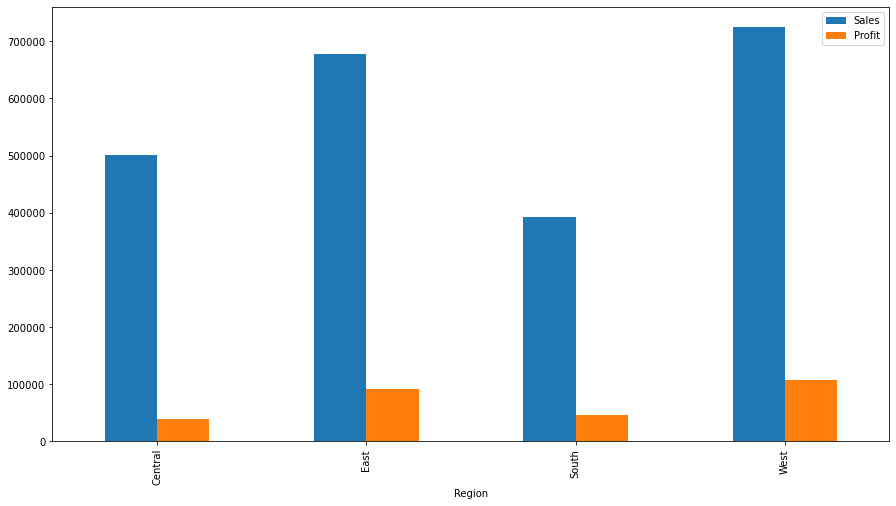

In [20]:
df.groupby(['Region'])[['Sales','Profit']].sum().plot(kind='bar')

    The highest Sales & Profit is shown in west region ,followed by East region
    The South region is with the lowest of sales followed by central region which is having the minimum profit


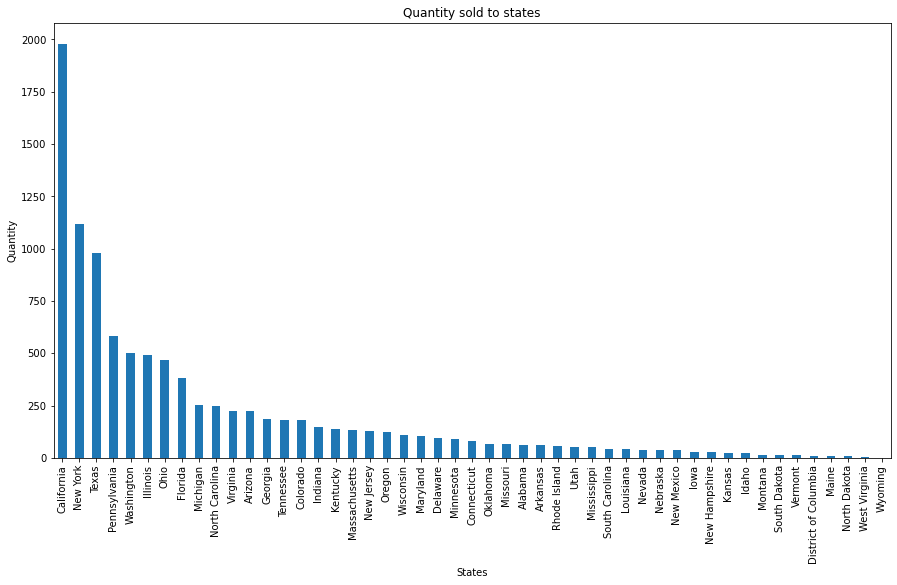

In [21]:
df_state_quantity=df.groupby(['State'])['Quantity'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold to states')
plt.xlabel('States')
plt.ylabel('Quantity')
plt.show()


    The highest amount of quantity sold to California, with almost 2K of total dealings.
    New York has the second highest dealings, with around 1,125 of total dealings.
    Texas is third with almost 1K of total dealings.
    The States where the sold quantity is not significant including the states having less than 100 need to improve their marketing quality

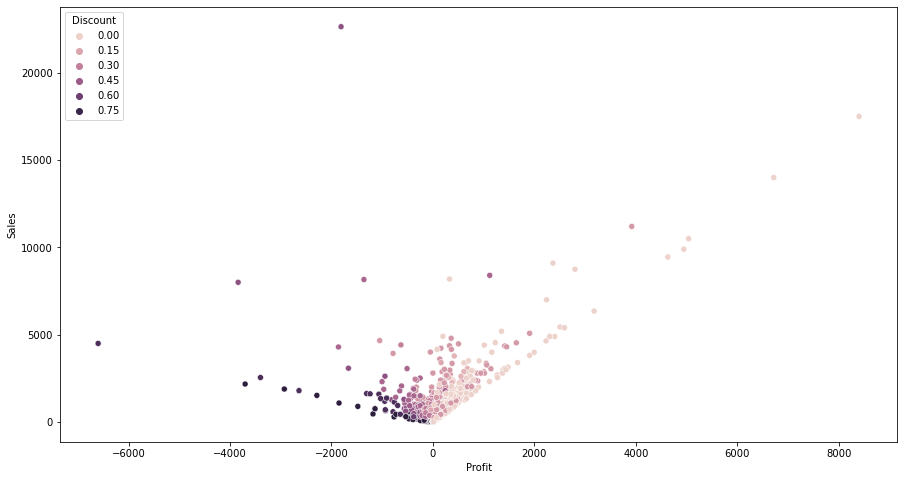

In [22]:
sns.scatterplot(df['Profit'],df['Sales'],hue=df['Discount'])
plt.show()

    Business giving a small percentages of discount like 15% or even upto 30% are getting a good profit almost upto $8K 
    meanwhile giving a huge amount of discount does not go really well for the business and they bear loss .
   The extent of losses goes upto $6k in some businesses as we can see that from the above plot

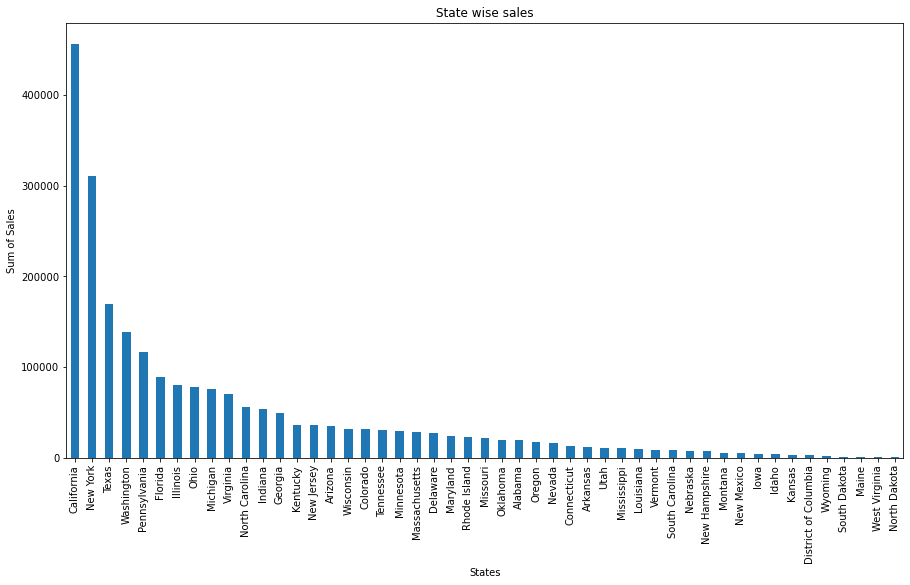

In [23]:
df_state_sales=df.groupby(['State'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise sales')
plt.xlabel('States')
plt.ylabel('Sum of Sales')
plt.show()


    The top 3 states here is same as for the previous analysis on number of dealings.

    Superstore has a notable highest sales in the state of California, with over USD$450K of total sales.

     New York has the second highest sales, with over USD$300k of total sales.

    with a noticeable difference Texas is third with around USD$170K of total sales.

    The states of Wyoming, South Dakota, Maine, West Virginia, and North Dakota have comparatively negligible sales. 
     marketing strategies should be improved in these areas as well as the states with less than USD$20k total sales.

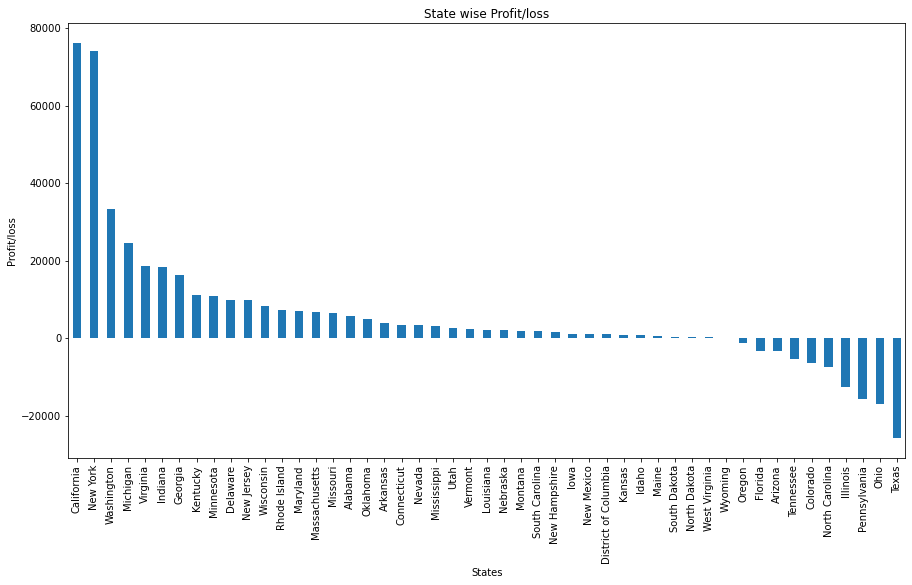

In [24]:
df_state_profit=df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise Profit/loss')
plt.xlabel('States')
plt.ylabel('Profit/loss')
plt.show()

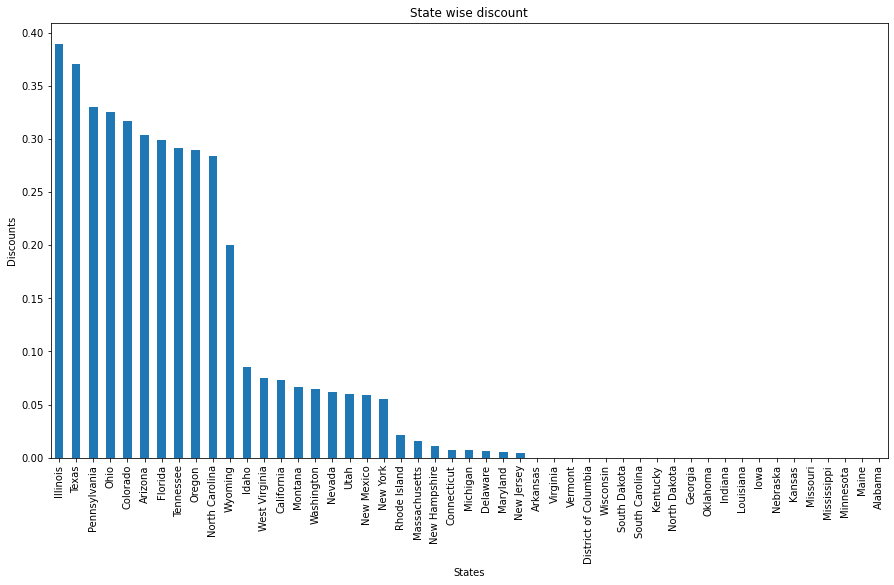

In [25]:
df_state_sales=df.groupby(['State'])['Discount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('State wise discount')
plt.xlabel('States')
plt.ylabel('Discounts')
plt.show()

    Just like the before interpretations California has the maximum profit ,following by New York 
    Then Wahington has the profit by a slight lower than the half of the profits by california and New York
    Texas bearing the max loss in sales though it was third highest in dealing the products,may be because of the
    highest discount it has.
                                                                                                                                        More like Texas some other stats also who gives high amount of discount bear the high amount of loss in sales,which is quite clear by the above plot

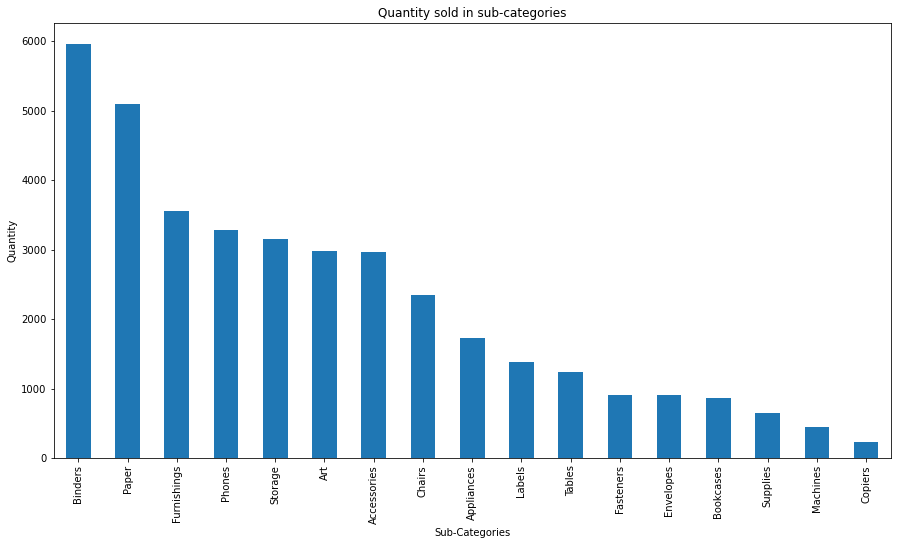

In [26]:
df_subcategory_deals=df.groupby(['Sub-Category'])['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold in sub-categories')
plt.xlabel('Sub-Categories')
plt.ylabel('Quantity')
plt.show()

                                                                                                                            Binders were sold in the largest quantity with almost 6000 units of it,followed by paper with 5000 units with a gap of 1500  units  from the highest selling products the furnishings,phones,storage,Art ,Accessories ,chairs are sold 
    upto more than 2500 units to 3500 units.
    The need of products like bookcases,copires ,machines are quite less .


<AxesSubplot:xlabel='Region'>

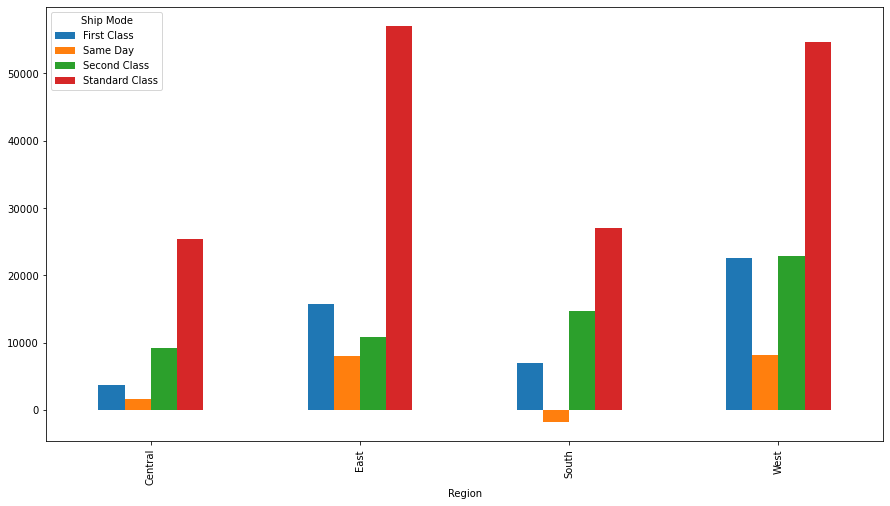

In [27]:
table=pd.crosstab(index=df['Region'],columns=df['Ship Mode'],values=df['Profit'],aggfunc='sum').plot(kind='bar')
table

    In all of the 4 regions standard class is the most preferred shipment mode giving the high profits .
    First class ship mode acquires the second position after standard class , with a big trailing gap 
    Shipments going out on the same day of order are showing the lowest profits , the arrangements for the transportation 
    may be the cause of this,
    In south region shipments on the day of order are going through a loss 

<AxesSubplot:xlabel='Segment'>

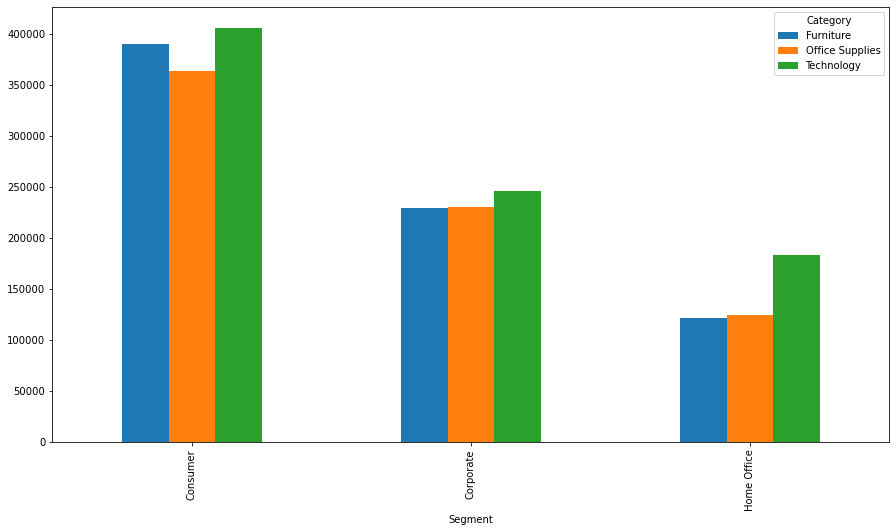

In [28]:
pd.crosstab(index=df['Segment'],columns=df['Category'],values=df['Sales'],aggfunc='sum').plot(kind='bar')

    Consumers are interested in purchasing the products in technology category ,the sales are approximately $400K in this segment then the furniture sales are slightly lesser than $400K ,and Office supplies are giving the sales   upto $350K.

        As quite obvious in the corporate sector products from technology category giving the highest sales followed by office supplies  and furnitures, and they are not at any bigger gap from the sales among each other .
    where technology products are taking the sales extent to almost $240K,office supllies and furnitures are also sold at $220K.

    Home office segment are taking the sales from $120K to $170K in the categories like furnitures,office supplies & 
    technology products respectively.

    As we go deep into the profits and losses from state-wise sales, a sample of 6 states are chosen based on 
    the categories of high profit, medium profit, low profit, low loss, medium loss, and high loss. Crucial trends are identified,
    starting from the collection of answers to the following targeted questions.

    Which products are popular in profit-making states?

    Which products are commonly purchased in loss-bearing states?

    Which product categories and sub-categories can be improved in order to increase profits?

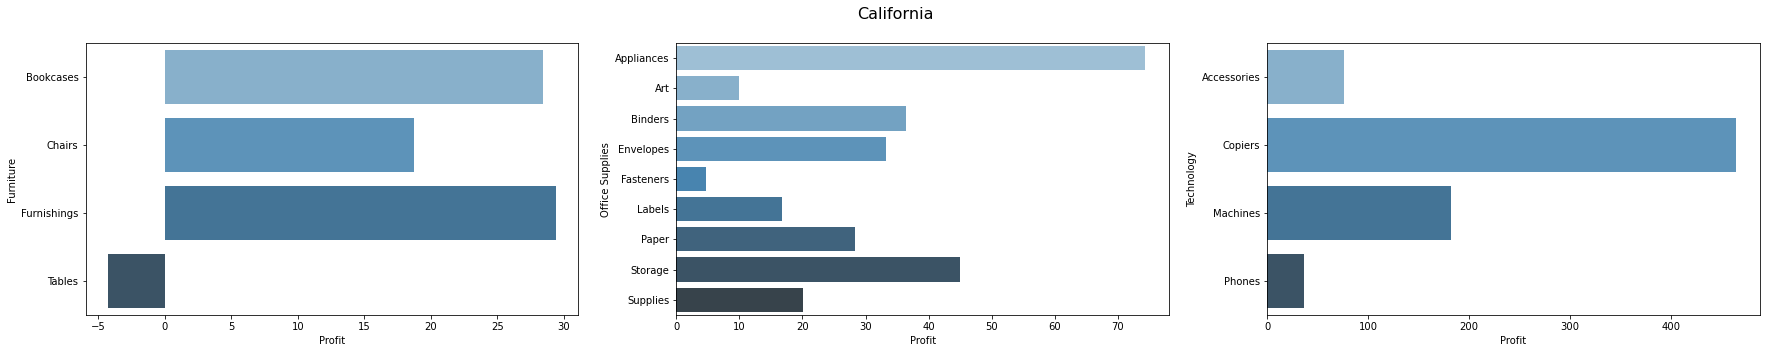

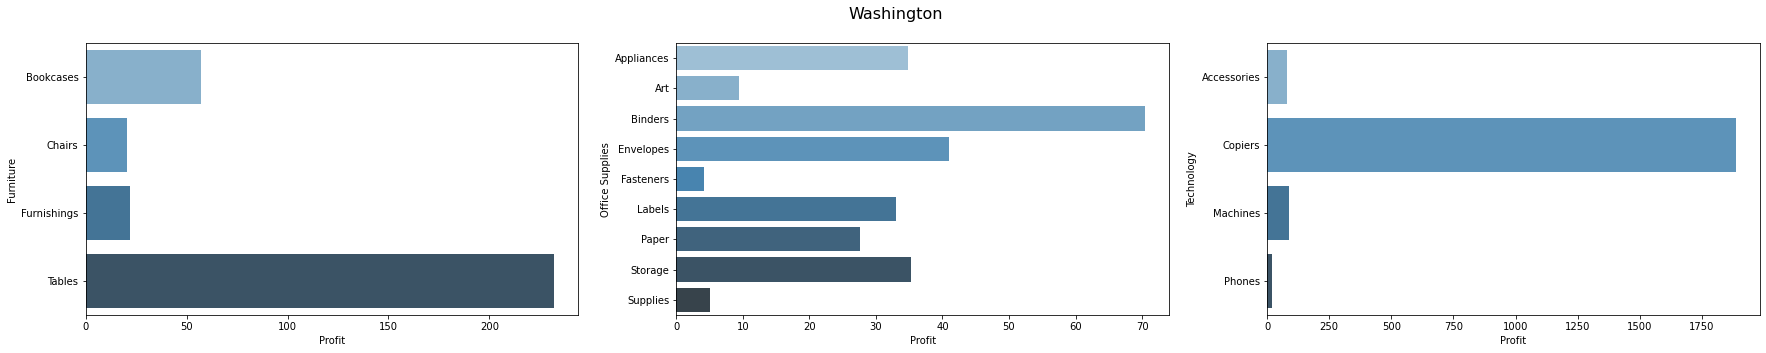

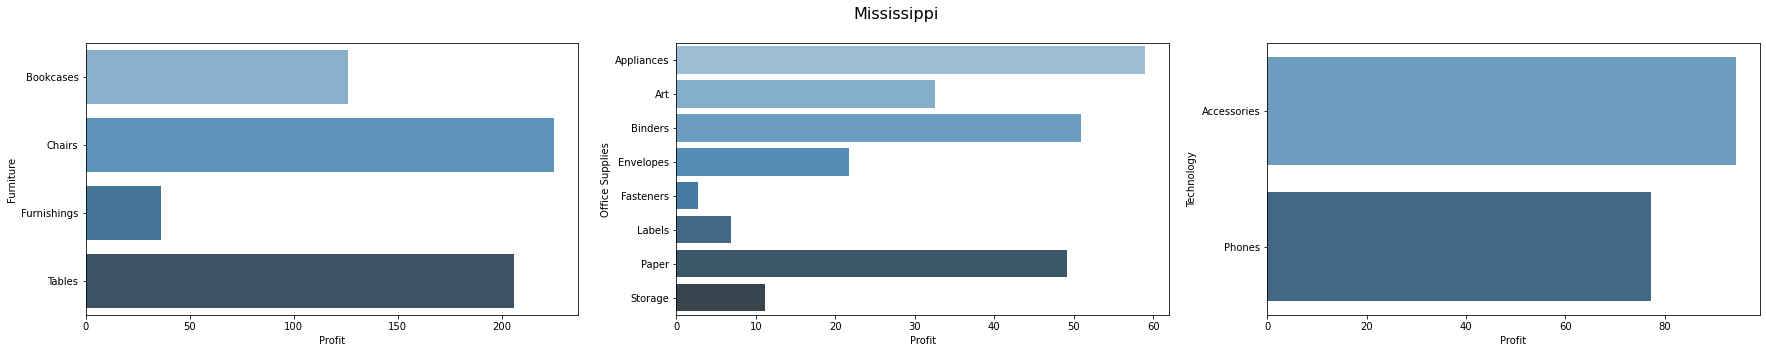

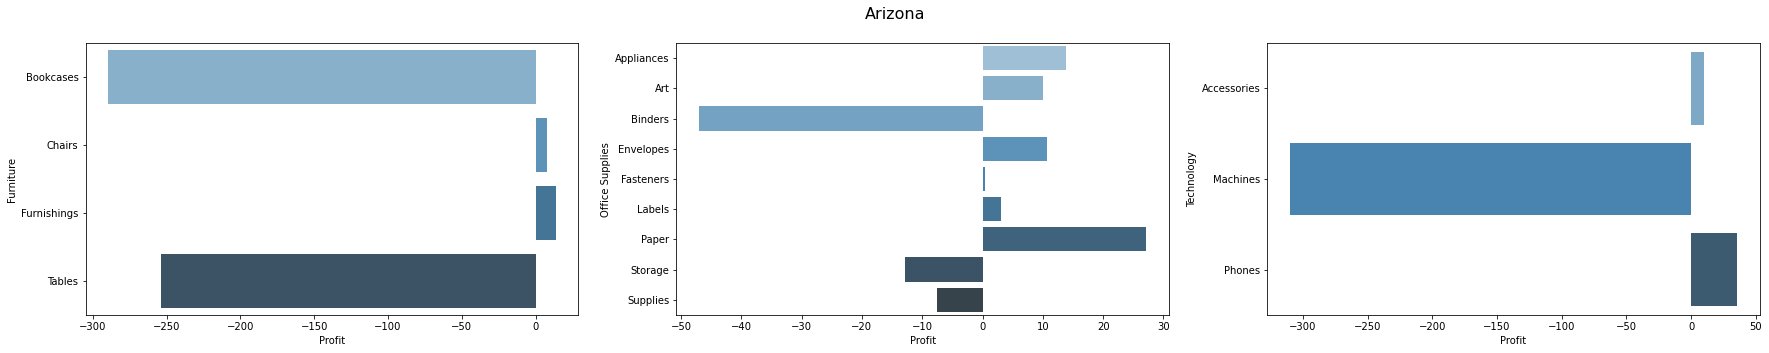

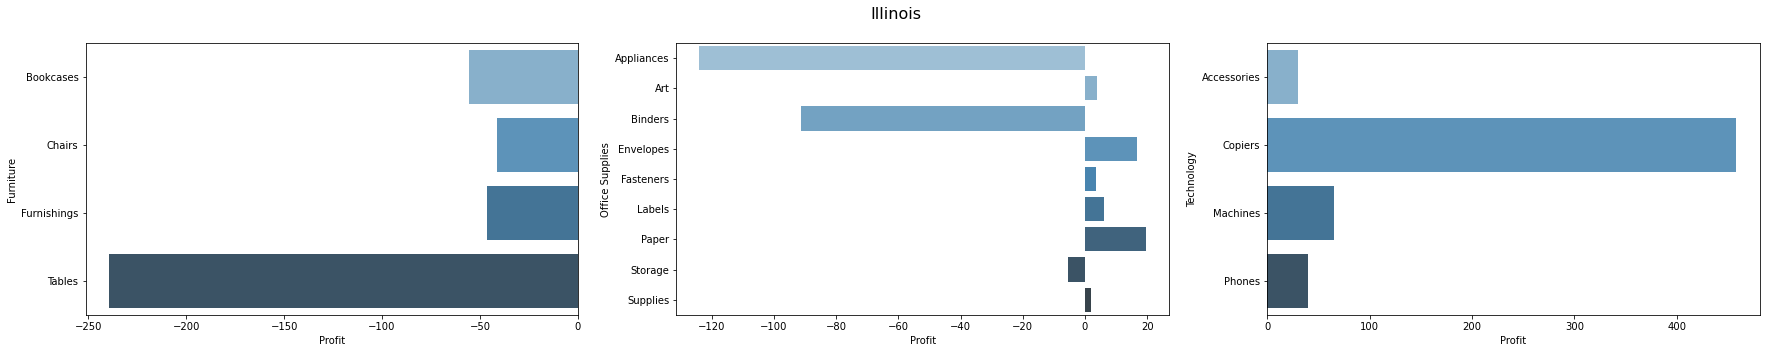

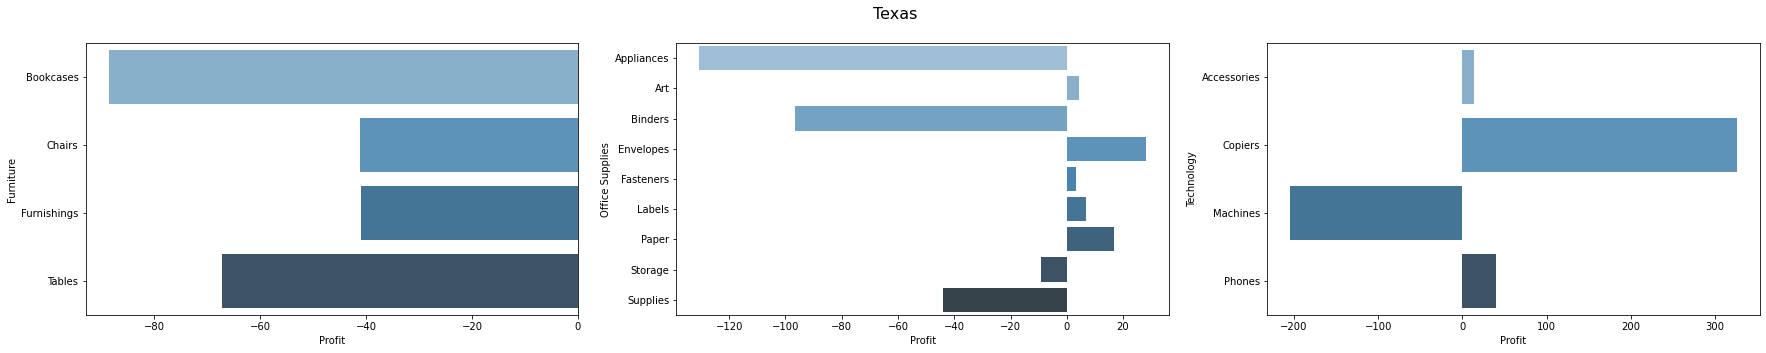

In [31]:
def state_data_viewer(states):
# plot profit of product categories and sub-categories for the chosen states
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30, 5))
        fig.suptitle(state, fontsize = 16)        
        ax_index = 0
        # plot a chart for each category
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            # plot sub-categories in each category
            category_data = data.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.Profit, y = category_data.index, 
                        ax = ax[ax_index], palette = 'Blues_d')
            ax[ax_index].set_ylabel(category)
            ax_index += 1
# chosen States based on profit/loss categories
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Illinois', 'Texas']
state_data_viewer(states)


    In high profit states such as California, all products sold across all categories and sub-categories are generating comparatively good profits, except for Tables in Furniture category which is suffering from an overall loss of $4 per unit sold. Superstore is advised to reduce discounts for Tables. The Technology category has the best performance.
    
            In medium profit states such as Washington, all products sold across all categories and sub-categories are generating good profits. Office Supplies generate less profits since their prices are low. Copiers make a notable highest profit of almost $2k profit per unit sold, with a significant trailing gap between Tables which is second highest at around $225 profit per unit sold. The Technology category has the best performance.
            
             In low profit states such as Mississippi, all products sold across all categories and sub-categories are generating good profits. The Furniture category has a notable best performance. There is no demand for Copiers and Machines to date. Superstore is advised to make marketing strategies one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers for these 2 sub-categories.




    In low loss states such as Arizona, most sub-categories generate little to no profits, and those that suffer from up to USD$300 of notable losses are Bookcases, Tables, Binders, and Machines. The Office Supplies category has the best performance. There is no demand for Copiers to date. Superstore is advised to make marketing strategies one of the main focuses to ensure increasing profitable sales and consistent future gains in long term customers for Copiers.

    In medium loss states such as Illinois, most sub-categories generate little to no profits, and those that suffer from up to USD$240 of notable losses are Tables, Appliances, and Binders. The Technology category has the best performance with Copiers making the highest profit of around USD\$450 profit per unit sold. The Furniture category's performance is going entirely in loss. Superstore is advised to reduce overall discounts, especially for Furniture.

    In high loss states such as Texas, the Technology category has the best performance with Copiers making the highest profit of around USD$325 profit per unit sold, while the Furniture category's performance is going entirely in loss. Most sub-categories incur significant losses of up to USD\$200, including Machines, Appliances, and Bookcases. Superstore is advised to reduce overall discounts, especially for Furniture.

    The overall observed negative trend is that all Furniture sub-categories as well as Appliances and Binders under the Office Supplies category contribute to a majority of losses. Superstore is advised to improve on the promotional strategies for these, as well as reduce overall discounts.

    The overall observed positive trend is that the sub-categories of Copiers, Accessories, Phones, Envelopes, and Paper are quite definitely profitable.